In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X = np.concatenate((X_train_full, X_test), axis=0)
y = np.concatenate((y_train_full, y_test), axis=0)

In [4]:
X = X.astype("float32") / 255.0
y = y.astype(np.int64)

# **Image Visualization Utility Function**
This defines a helper function `plot_image` that takes a flattened image array, reshapes it to 28x28 pixels, and displays it using `matplotlib`. This function is useful for quickly visualizing individual digits.

In [5]:
def plot_image(image_data):
  image = image_data.reshape(28,28)
  plt.figure(figsize = (4,4))
  plt.imshow(image,cmap = 'binary')
  plt.tight_layout()
  plt.axis('off')
  plt.show()


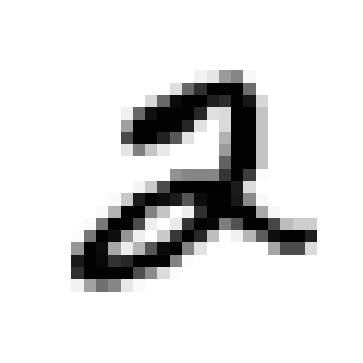

In [6]:
some_image = X[5]
plot_image(some_image)

# **Displaying Multiple Sample Images**:
This cell generates a 10x10 grid of the first 100 images from the dataset, providing a quick overview of the data.

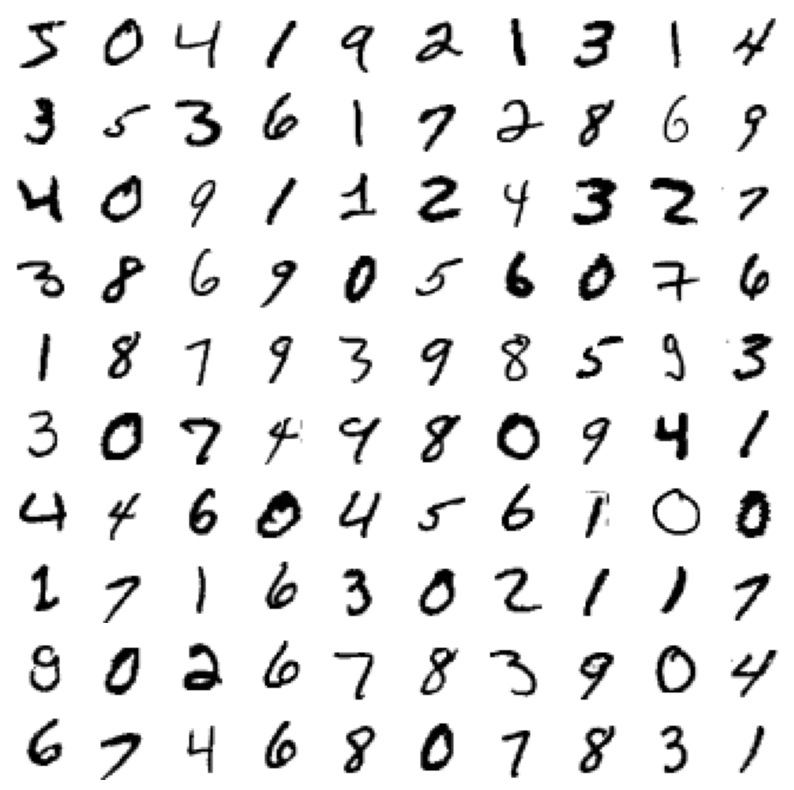

In [7]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  image_data = X[i]
  image_data = image_data.reshape(28,28)
  plt.imshow(image_data,cmap = 'binary')
  plt.axis('off')
plt.show()

# Defining the Neural Network Model
This cell constructs a Sequential Keras model for digit classification. It includes several `Dense` layers with `relu` activation, interspersed with `BatchNormalization` layers to improve training stability and performance. The output layer uses `softmax` activation for multi-class classification.

In [8]:
from tensorflow.keras.layers import BatchNormalization
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(300,activation = 'relu'),BatchNormalization(),
    tf.keras.layers.Dense(200,activation = 'relu'),BatchNormalization(),
    tf.keras.layers.Dense(100,activation = 'relu'),BatchNormalization(),
    tf.keras.layers.Dense(50, activation = 'relu'),BatchNormalization(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,960 (1.24 MB)

 Trainable params: 322,660 (1.23 MB)

 Non-trainable params: 1,300 (5.08 KB)

In [10]:
model.layers

[<Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dense name=dense_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dense name=dense_3, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Dense name=dense_4, built=True>]

#Compiling the Model
Here, the model is compiled with `sparse_categorical_crossentropy` as the loss function (suitable for integer labels), `RMSprop` optimizer with a learning rate of 1e-3, and `accuracy` as the evaluation metric.

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3),metrics =['accuracy'])

# Splitting Data into Training and Test Sets
This cell uses `sklearn.model_selection.train_test_split` to divide the dataset `X` and `y` into training and test sets. 80% of the data is used for training and 20% for testing, with `random_state=42` for reproducibility.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Explanation of Data Augmentation Techniques

The below code cells implements six distinct data augmentation techniques to artificially expand the training dataset and improve the model's robustness to variations in handwritten digits:

**shift_left(X)**: This function shifts all pixels in the input images 2 pixels to the left. This helps the model learn to recognize digits even when they are slightly offset to the left.

**shift_right(X)**: Similarly, this function shifts all pixels in the images 2 pixels to the right, aiding in generalization for rightward-shifted digits.

**shift_up(X)**: This technique shifts all pixels 2 pixels upwards, addressing vertical variations in digit placement.

**shift_down(X)**: This function shifts all pixels 2 pixels downwards, helping the model become invariant to downward-shifted digits.

**zoom_in(X, zoom_factor=1.2)**: This function simulates a 'zoom in' effect. It magnifies the image by a zoom_factor (defaulting to 1.2) and then crops the center 28x28 region. This augmentation helps the model handle variations in digit size where the digit might appear larger or closer.

**zoom_out(X, zoom_factor=0.8)**: This function creates a 'zoom out' effect. It shrinks the image by a zoom_factor (defaulting to 0.8) and places the smaller image in the center of a new 28x28 blank canvas. This helps the model recognize digits that appear smaller or further away within the image frame.

In [13]:
def shift_left(X):
    X_3D = X.reshape(-1,28,28)
    shifted = np.zeros_like(X_3D)
    shifted[:, :, :-2] = X_3D[:, :, 2:]
    return shifted.reshape(-1,28*28)

In [14]:
def shift_right(X):
    X_3D = X.reshape(-1,28,28)
    shifted = np.zeros_like(X_3D)
    shifted[:, :, 2:] = X_3D[:, :, :-2]
    return shifted.reshape(-1,28*28)

In [15]:
def shift_up(X):
    X_3D = X.reshape(-1,28,28)
    shifted = np.zeros_like(X_3D)
    shifted[:, :-2, :] = X_3D[:, 2:, :]
    return shifted.reshape(-1,28*28)

In [16]:
def shift_down(X):
    X_3D = X.reshape(-1,28,28)
    shifted = np.zeros_like(X_3D)
    shifted[:, 2:, :] = X_3D[:, :-2, :]
    return shifted.reshape(-1,28*28)

In [17]:
from scipy.ndimage import zoom

def zoom_in(X, zoom_factor=1.2):
    X_3D = X.reshape(-1, 28, 28)
    zoomed_images = np.zeros_like(X_3D)

    for i, img in enumerate(X_3D):

        zoomed = zoom(img, zoom=zoom_factor)

        center = zoomed.shape[0] // 2
        half = 14

        cropped = zoomed[
            center - half : center + half,
            center - half : center + half
        ]

        if cropped.shape != (28, 28):
            cropped = cropped[:28, :28]

        zoomed_images[i] = cropped

    return zoomed_images.reshape(-1, 28*28)


In [18]:
def zoom_out(X, zoom_factor=0.8):

    X_3D = X.reshape(-1, 28, 28)
    zoomed_images = np.zeros_like(X_3D)

    for i, img in enumerate(X_3D):

        shrunk = zoom(img, zoom=zoom_factor)

        new_img = np.zeros((28, 28))


        h, w = shrunk.shape
        top = (28 - h) // 2
        left = (28 - w) // 2

        new_img[top:top+h, left:left+w] = shrunk

        zoomed_images[i] = new_img

    return zoomed_images.reshape(-1, 28*28)


In [19]:
X_shifted_left = shift_left(X_train)

In [20]:
X_shifted_right = shift_right(X_train)

In [21]:
X_shifted_up = shift_up(X_train)

In [22]:
X_shifted_down = shift_down(X_train)

In [23]:
X_zoomed_in = zoom_in(X_train)

In [24]:
X_zoomed_out = zoom_out(X_train)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)

In [26]:
X_train_augmented = np.vstack([X_train,X_shifted_left,  X_shifted_right , X_shifted_up , X_shifted_down,X_zoomed_in,X_zoomed_out])

In [27]:
y_train_augmented = np.hstack([y_train,y_train,y_train,y_train,y_train,y_train,y_train])

In [28]:
X_train_augmented.shape

(392000, 784)

In [29]:
y_train_augmented.shape

(392000,)

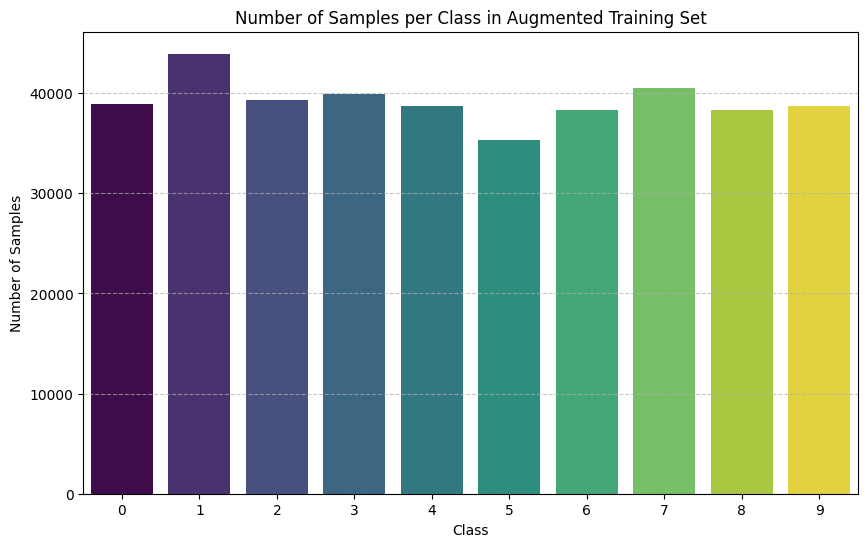

In [30]:
class_counts = pd.Series(y_train_augmented).value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values,hue = class_counts.index,palette='viridis',legend = False)
plt.title('Number of Samples per Class in Augmented Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Model Training
This cell trains the defined neural network model using the `X_train_augmented` and `y_train_augmented` data for 30 epochs. A `validation_split` of 0.1 is used to monitor performance on unseen data during training.

In [31]:
history = model.fit(
    X_train_augmented, y_train_augmented,
    epochs=30,
    validation_split=0.1
)

Epoch 1/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 122s 11ms/step - accuracy: 0.9041 - loss: 0.3093 - val_accuracy: 0.9665 - val_loss: 0.1080
Epoch 2/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 92s 8ms/step - accuracy: 0.9684 - loss: 0.1041 - val_accuracy: 0.9701 - val_loss: 0.1009
Epoch 3/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.9746 - val_loss: 0.0862
Epoch 4/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 0.9754 - val_loss: 0.0898
Epoch 5/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9771 - val_loss: 0.0874
Epoch 6/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9775 - val_loss: 0.0925
Epoch 7/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 90s 8ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9784 - val_loss: 0.0868
Epoch 8/30
11025/11025 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - accuracy

### Plotting Training History
This plot visualizes the model's training and validation loss and accuracy over the 30 epochs. It helps in understanding the model's learning progress and detecting overfitting or underfitting.

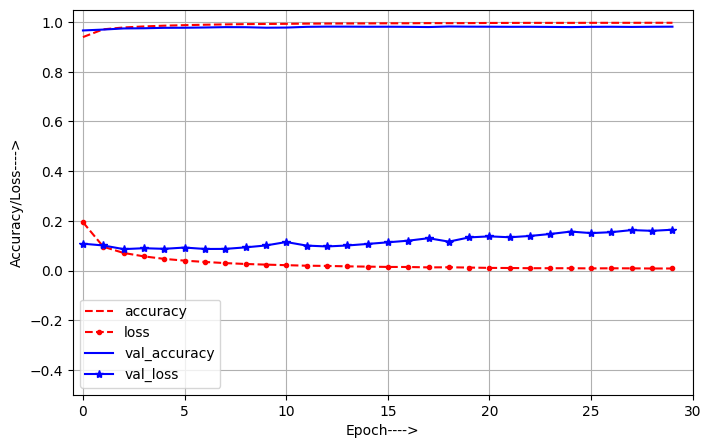

In [32]:
pd.DataFrame(history.history).plot(
    figsize = (8,5),
    xlim = [-0.5,30],
    ylim = [-0.5,1.05],
    grid = True,
    xlabel = 'Epoch---->',
    ylabel = 'Accuracy/Loss---->',
    style = ['r--','r--.','b-','b-*'])
plt.show()

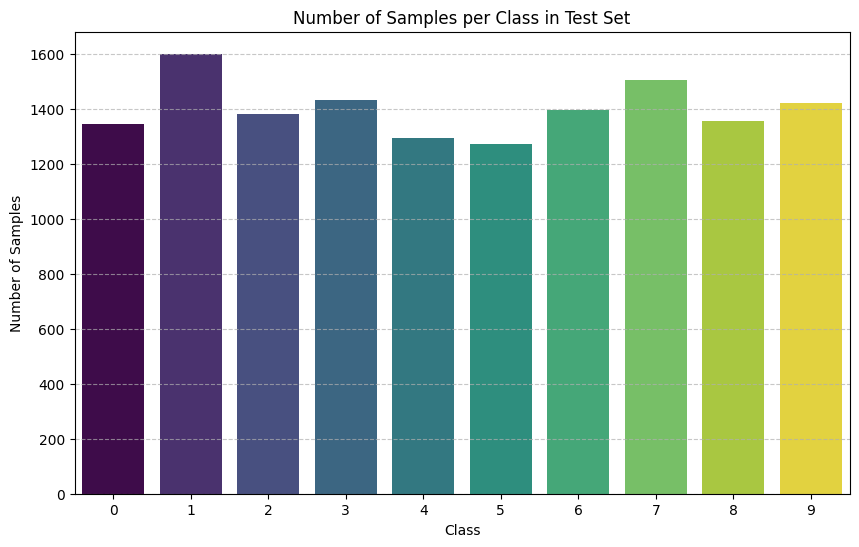

In [33]:
class_counts_test = pd.Series(y_test).value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts_test.index, y=class_counts_test.values, hue=class_counts_test.index, palette='viridis',legend = False)
plt.title('Number of Samples per Class in Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
X_test_reshaped = X_test.reshape(-1, 28*28)
model.evaluate(X_test_reshaped,y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0919


[0.1031043604016304, 0.9884285926818848]

In [35]:
y_prob = model.predict(X_test_reshaped)
y_prob

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[6.39201944e-20, 6.97289192e-26, 1.21969409e-16, ...,
        3.26995098e-10, 9.99999940e-01, 2.14085382e-13],
       [2.54659134e-14, 4.44381620e-20, 1.69683066e-16, ...,
        5.89771546e-18, 1.80794291e-15, 5.41339095e-14],
       [1.89160354e-11, 6.90674351e-13, 1.31677226e-14, ...,
        2.95784869e-10, 9.99983132e-01, 1.40813454e-05],
       ...,
       [9.01400749e-23, 5.93983854e-28, 9.99999940e-01, ...,
        1.62585161e-20, 5.87697729e-21, 1.15178541e-19],
       [1.01064625e-14, 1.48865469e-15, 3.21354136e-15, ...,
        9.99999940e-01, 6.85526661e-17, 2.21543825e-11],
       [8.74228966e-20, 9.99999940e-01, 4.17818474e-10, ...,
        4.00698707e-13, 2.59885357e-15, 1.13637760e-15]], dtype=float32)

In [36]:
y_pred = y_prob.argmax(axis = -1)
y_pred

array([8, 4, 8, ..., 2, 7, 1])

# Calculating Performance Metrics
These cells calculate various classification metrics to provide a comprehensive evaluation of the model's performance on the test set. These metrics include:
- **Accuracy Score**: The proportion of correctly classified instances.
- **Precision Score**: The ratio of correctly predicted positive observations to the total predicted positives, calculated with `average='weighted'` to account for class imbalance.
- **Recall Score**: The ratio of correctly predicted positive observations to the all observations in actual class, also calculated with `average='weighted'`.
- **F1-Score**: The weighted average of Precision and Recall, calculated with `average='weighted'`.
- **ROC AUC Score**: The Area Under the Receiver Operating Characteristic curve, useful for multi-class problems using `multi_class='ovr'` (one-vs-rest).
- **Log Loss**: A measure of the prediction error, penalizing incorrect classifications with high confidence.
- **Cohen's Kappa Score**: A robust statistic that measures inter-rater reliability for categorical items.
- **Matthews Correlation Coefficient (MCC)**: A measure of the quality of binary (or multi-class) classifications. It is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.
- **Top-K Accuracy Score**: The percentage of times the true label is among the top-k predicted labels, useful for seeing if the true class is ranked high even if not the top prediction.

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

98.84285714285714

In [38]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average = 'weighted')*100

98.84410556571474

In [39]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average = 'weighted')*100

98.84285714285714

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average = 'weighted')*100

98.84216513025119

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob, multi_class='ovr')

np.float64(0.9996145765517632)

In [42]:
from sklearn.metrics import log_loss
log_loss(y_test,y_prob)

0.08557006512580598

In [43]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred)

np.float64(0.9871365133437745)

In [44]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

np.float64(0.9871393464497688)

In [45]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test,y_prob, k=3)*100

np.float64(99.88571428571429)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1333,    0,    1,    0,    0,    1,    5,    1,    1,    1],
       [   0, 1593,    1,    2,    1,    0,    0,    2,    0,    1],
       [   0,    3, 1368,    1,    0,    1,    0,    5,    2,    0],
       [   0,    0,   10, 1416,    0,    3,    0,    2,    1,    1],
       [   0,    0,    1,    0, 1281,    0,    4,    4,    1,    4],
       [   1,    0,    0,   11,    0, 1253,    4,    0,    3,    1],
       [   0,    0,    1,    0,    1,    1, 1392,    0,    1,    0],
       [   1,    3,    4,    0,    5,    2,    0, 1483,    0,    5],
       [   0,    4,    6,    7,    2,    6,    2,    2, 1320,    8],
       [   4,    0,    0,    1,    7,    2,    0,    5,    2, 1399]])

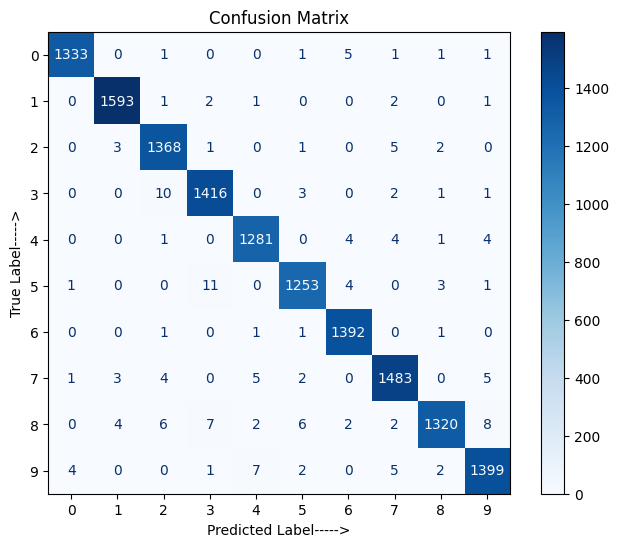

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8,6))
cm_display.plot(
    cmap='Blues',
    ax=ax,
    colorbar=True,
    values_format='d'
)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label----->')
ax.set_ylabel('True Label----->')

plt.show()

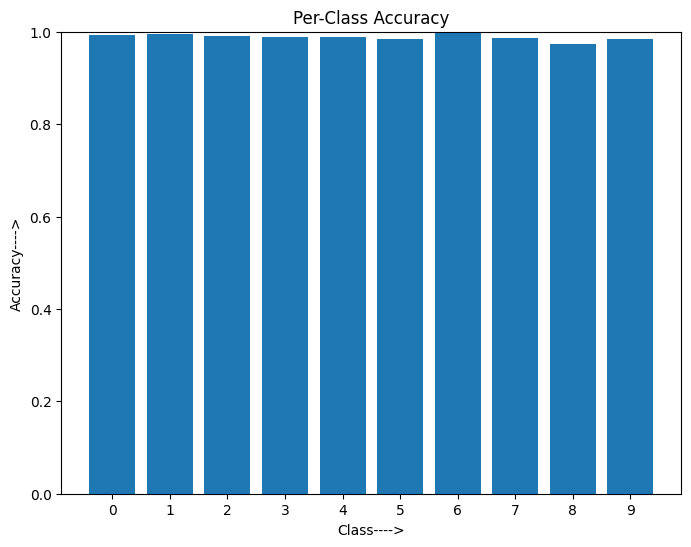

In [48]:
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.bar(range(len(per_class_accuracy)), per_class_accuracy, tick_label=range(len(per_class_accuracy)))
plt.xlabel('Class---->')
plt.ylabel('Accuracy---->')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.0)
plt.show()

### Binarizing Test Labels
To generate ROC and Precision-Recall curves for multi-class classification, the `y_test` labels are converted into a one-hot encoded (binarized) format using `LabelBinarizer`.

In [49]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)
n_classes = y_test_binarized.shape[1]

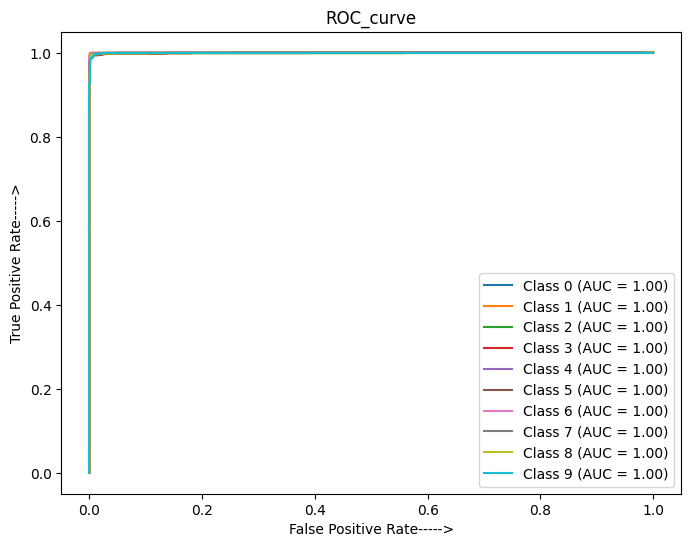

In [50]:
from sklearn.metrics import roc_curve , auc
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.legend()
plt.title('ROC_curve')
plt.xlabel('False Positive Rate----->')
plt.ylabel('True Positive Rate----->')
plt.show()

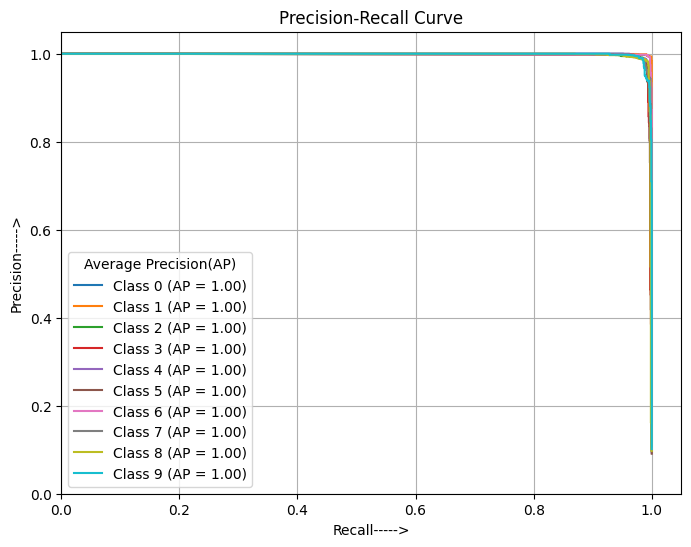

In [51]:
from sklearn.metrics import precision_recall_curve , average_precision_score
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {average_precision:.2f})')

plt.xlabel('Recall----->')
plt.ylabel('Precision----->')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left',title = 'Average Precision(AP)')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

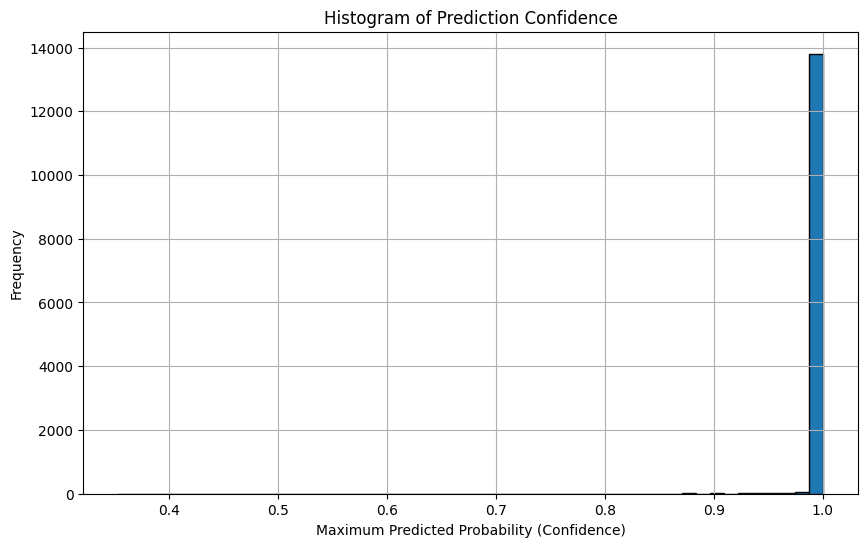

In [52]:
y_pred_proba_max = np.max(y_prob, axis=1)

plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_max, bins=50, edgecolor='black')
plt.xlabel('Maximum Predicted Probability (Confidence)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Confidence')
plt.grid(True)
plt.show()

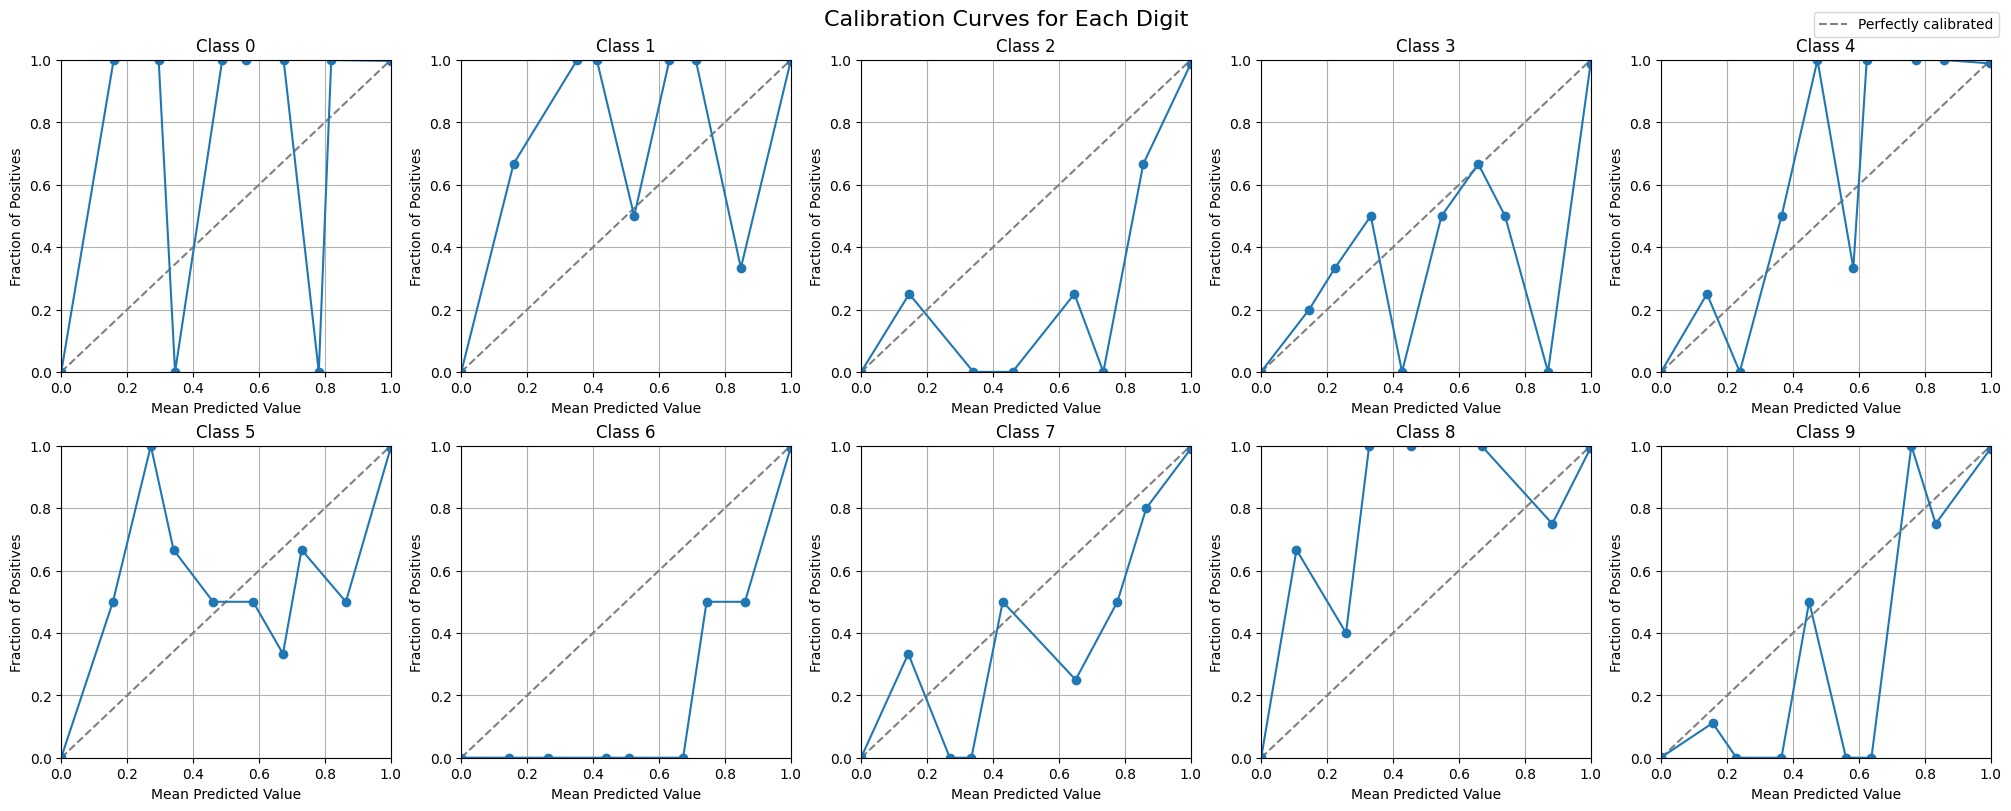

In [53]:
from sklearn.calibration import calibration_curve

fig, axes = plt.subplots(2, 5, figsize=(20, 8), constrained_layout=True)
axes = axes.flatten()

for i in range(n_classes):
    ax = axes[i]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_binarized[:, i], y_prob[:, i], n_bins=10)
    if i == 0:
        ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
    else:
        ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.plot(mean_predicted_value, fraction_of_positives, marker='o')

    ax.set_title(f'Class {i}')
    ax.set_xlabel('Mean Predicted Value')
    ax.set_ylabel('Fraction of Positives')
    ax.grid(True)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])

plt.suptitle('Calibration Curves for Each Digit', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()

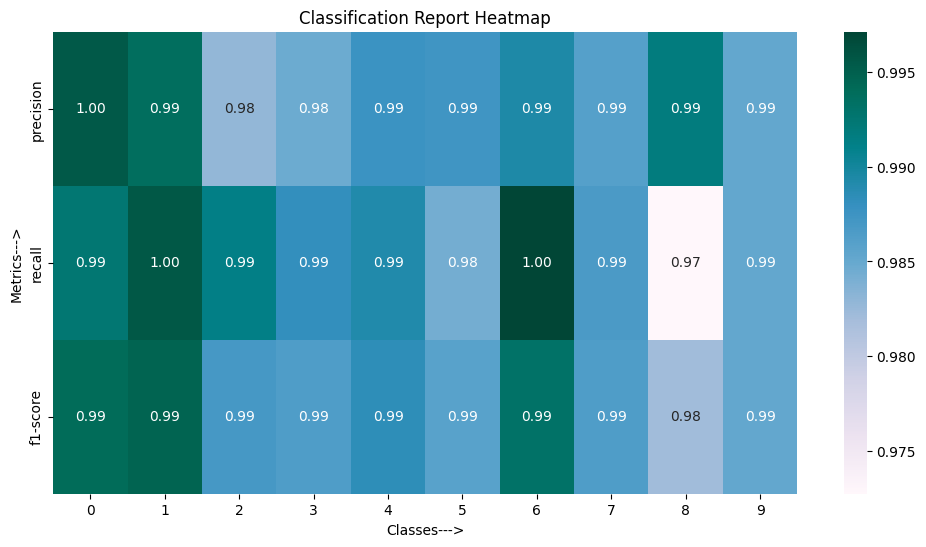

In [54]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report = clf_report.drop(columns=['support'])
plt.figure(figsize=(12, 6))
sns.heatmap(clf_report.iloc[:-3, :].T, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics--->')
plt.xlabel('Classes--->')
plt.show()

# Displaying High-Confidence Correctly Classified Images
This cell identifies and displays a selection of first 25 images that were correctly classified by the model with a high prediction probability (>= 90%). This showcases instances where the model performed exceptionally well.

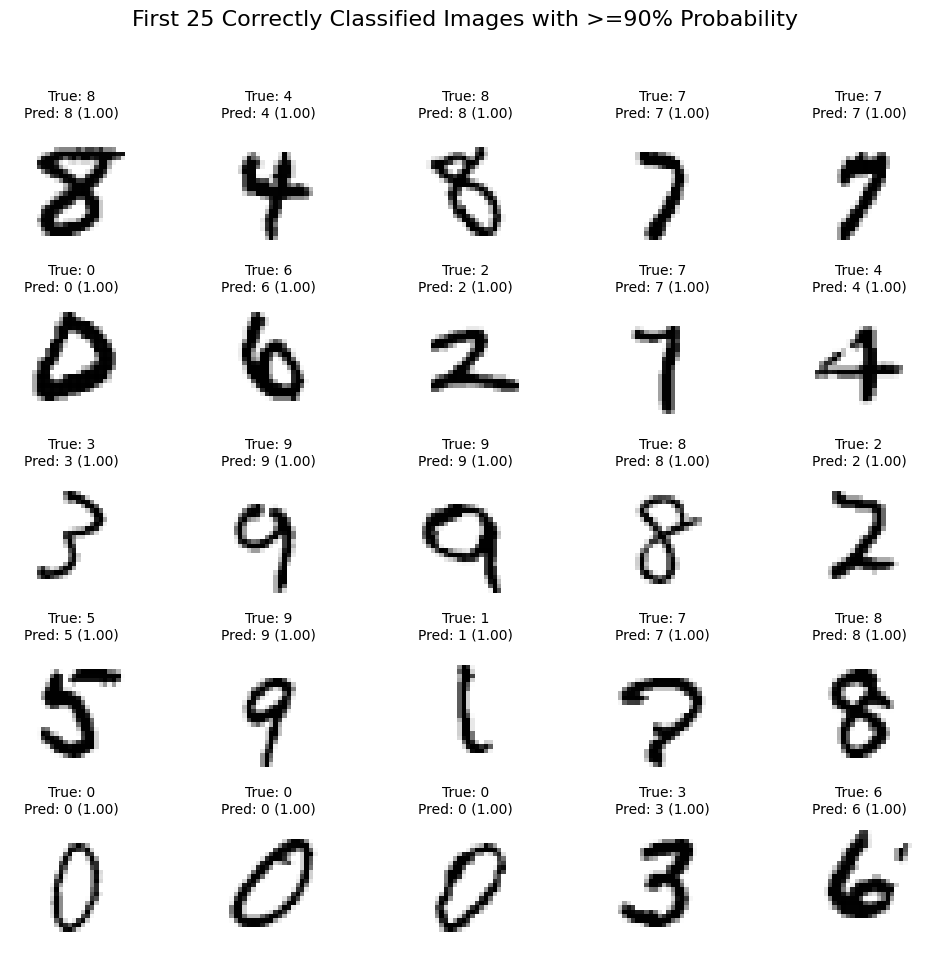

In [55]:
correctly_classified_indices = np.where(y_test == y_pred)[0]

high_prob_correctly_classified_indices = []
for idx in correctly_classified_indices:
    predicted_class_prob = y_prob[idx, y_pred[idx]]
    if predicted_class_prob >= 0.90:
        high_prob_correctly_classified_indices.append(idx)

plt.figure(figsize=(10, 10))
plt.suptitle('First 25 Correctly Classified Images with >=90% Probability', fontsize=16)
for i, idx in enumerate(high_prob_correctly_classified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    image_data = X_test[idx].reshape(28, 28)
    plt.imshow(image_data, cmap='binary')
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]} ({y_prob[idx, y_pred[idx]]:.2f})', fontsize=10)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Displaying Misclassified Images
This cell identifies and displays a selection of first 25 images that were misclassified by the model. Examining these images can provide insights into the types of errors the model makes and potential areas for improvement.

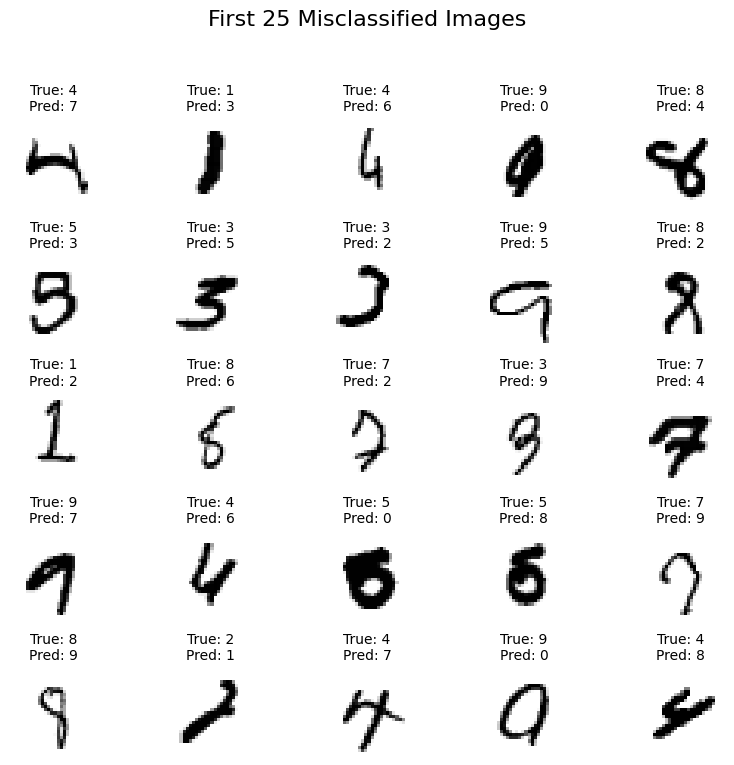

In [56]:
misclassified_idx = np.where(y_test != y_pred)[0]
plt.figure(figsize=(8, 8))
plt.suptitle('First 25 Misclassified Images', fontsize=16)
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i + 1)
    image_data = X_test[idx].reshape(28, 28)
    plt.imshow(image_data, cmap='binary')
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Saving the Trained Model
This cell uses `joblib.dump` to save the trained Keras model to a file named `Sequential_Perceptron_model.pkl`. This allows the model to be reloaded and used later without needing to retrain it.

In [57]:
import joblib
joblib.dump(model,'Sequential_Perceptron_model.pkl')
print('Sequential model dumped successfully.')

Sequential model dumped successfully.
